In [2]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def svm(X, Y, d):
    constraints = []
    w = cp.Variable(d)
    b = cp.Variable(1)
    for i in range(len(X)):
        constraints.append(Y[i]*(X[i]@w + b) >= 1)
    objective = cp.Minimize(cp.sum_squares(w))
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    return w.value, b.value


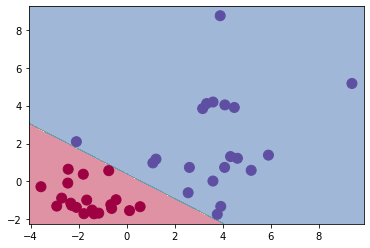

In [56]:
n, d = 20, 2
X1 = np.array([3, 2]) + 2*np.random.randn(n, d)
X2 = np.array([-1, -1]) + np.random.randn(n, d)
X = np.concatenate((X1, X2))
Y = [1]*n + [-1]*n
w_opt, b_opt = svm(X, Y, d)
plot_decision_boundary(lambda x: np.sign(x@w_opt + b_opt), X, Y)

In [20]:
def plot_decision_boundary(pred_func, X, Y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c = Y, s = 100, cmap=plt.cm.Spectral)
